# 원, 삼각형, 사각형 구분하기
## 2. 어려운 테스트 문제를 기존 CNN 모델로 푸는 경우

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [9]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터셋 생성하기

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [11]:
train_generator.labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

### 모델 구성하기

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

### 모델 그래프로 보기
- conda install pydot
- conda install graphviz

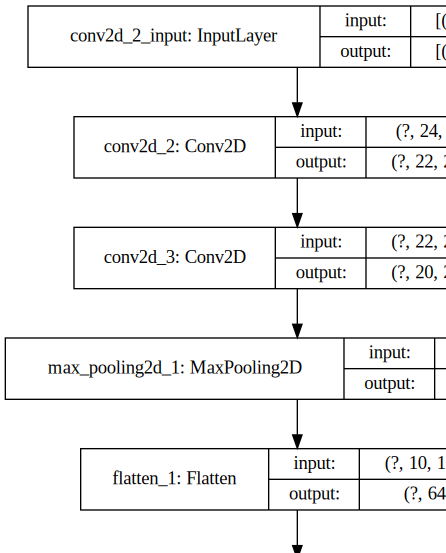

In [13]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

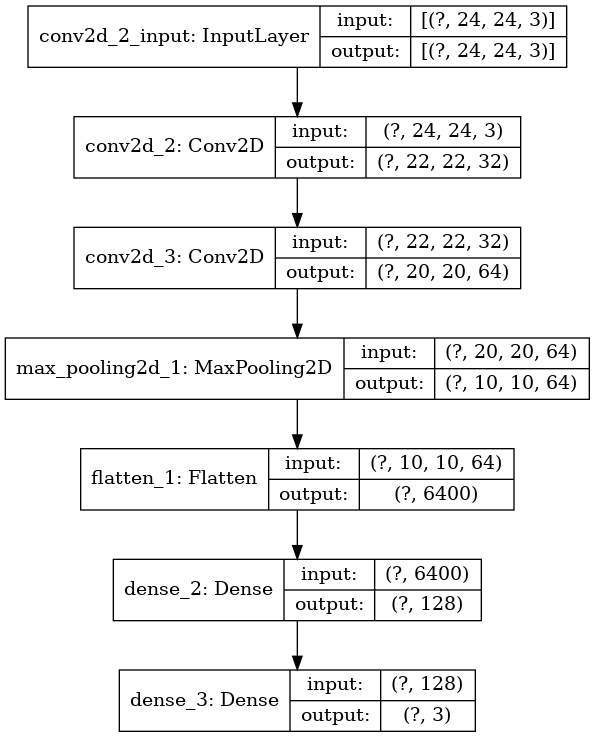

In [14]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)    # to_file='filename.png'


### 모델 학습과정 설정하기

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/200
15/15 [==============================] - 0s 15ms/step - loss: 0.7912 - accuracy: 0.6222 - val_loss: 1.3569 - val_accuracy: 0.2667
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1834 - accuracy: 0.9333 - val_loss: 3.1545 - val_accuracy: 0.4000
Epoch 3/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 6.2291 - val_accuracy: 0.1333
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 2.6478 - val_accuracy: 0.4000
Epoch 5/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0360 - accuracy: 0.9778 - val_loss: 2.9368 - val_accuracy: 0.3333
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 3.6035 - val_accuracy: 0.3333
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 5.3832e-04 - accuracy: 1.0000 - val_loss: 3.9416 - val_accuracy: 0.4000
Epoch 8/

15/15 [==============================] - 0s 7ms/step - loss: 5.9445e-06 - accuracy: 1.0000 - val_loss: 5.6322 - val_accuracy: 0.3333
Epoch 58/200
15/15 [==============================] - 0s 7ms/step - loss: 5.7432e-06 - accuracy: 1.0000 - val_loss: 5.5469 - val_accuracy: 0.3333
Epoch 59/200
15/15 [==============================] - 0s 7ms/step - loss: 5.5630e-06 - accuracy: 1.0000 - val_loss: 3.3222 - val_accuracy: 0.4667
Epoch 60/200
15/15 [==============================] - 0s 7ms/step - loss: 5.3538e-06 - accuracy: 1.0000 - val_loss: 6.3085 - val_accuracy: 0.2667
Epoch 61/200
15/15 [==============================] - 0s 7ms/step - loss: 5.1869e-06 - accuracy: 1.0000 - val_loss: 5.1653 - val_accuracy: 0.3333
Epoch 62/200
15/15 [==============================] - 0s 7ms/step - loss: 4.9961e-06 - accuracy: 1.0000 - val_loss: 6.0549 - val_accuracy: 0.2000
Epoch 63/200
15/15 [==============================] - 0s 7ms/step - loss: 4.7975e-06 - accuracy: 1.0000 - val_loss: 5.1016 - val_accuracy

15/15 [==============================] - 0s 7ms/step - loss: 1.2239e-06 - accuracy: 1.0000 - val_loss: 7.1450 - val_accuracy: 0.2667
Epoch 114/200
15/15 [==============================] - 0s 7ms/step - loss: 1.2027e-06 - accuracy: 1.0000 - val_loss: 5.5532 - val_accuracy: 0.3333
Epoch 115/200
15/15 [==============================] - 0s 7ms/step - loss: 1.1788e-06 - accuracy: 1.0000 - val_loss: 4.8797 - val_accuracy: 0.3333
Epoch 116/200
15/15 [==============================] - 0s 7ms/step - loss: 1.1524e-06 - accuracy: 1.0000 - val_loss: 5.4720 - val_accuracy: 0.3333
Epoch 117/200
15/15 [==============================] - 0s 7ms/step - loss: 1.1206e-06 - accuracy: 1.0000 - val_loss: 7.1312 - val_accuracy: 0.2000
Epoch 118/200
15/15 [==============================] - 0s 7ms/step - loss: 1.0994e-06 - accuracy: 1.0000 - val_loss: 3.4658 - val_accuracy: 0.4667
Epoch 119/200
15/15 [==============================] - 0s 7ms/step - loss: 1.0729e-06 - accuracy: 1.0000 - val_loss: 4.1183 - val_ac

Epoch 169/200
15/15 [==============================] - 0s 7ms/step - loss: 4.3975e-07 - accuracy: 1.0000 - val_loss: 5.0027 - val_accuracy: 0.3333
Epoch 170/200
15/15 [==============================] - 0s 7ms/step - loss: 4.3445e-07 - accuracy: 1.0000 - val_loss: 6.5177 - val_accuracy: 0.3333
Epoch 171/200
15/15 [==============================] - 0s 7ms/step - loss: 4.2121e-07 - accuracy: 1.0000 - val_loss: 5.6990 - val_accuracy: 0.3333
Epoch 172/200
15/15 [==============================] - 0s 7ms/step - loss: 4.1591e-07 - accuracy: 1.0000 - val_loss: 6.1821 - val_accuracy: 0.3333
Epoch 173/200
15/15 [==============================] - 0s 7ms/step - loss: 4.1061e-07 - accuracy: 1.0000 - val_loss: 5.7131 - val_accuracy: 0.2667
Epoch 174/200
15/15 [==============================] - 0s 7ms/step - loss: 4.0531e-07 - accuracy: 1.0000 - val_loss: 4.7123 - val_accuracy: 0.4667
Epoch 175/200
15/15 [==============================] - 0s 7ms/step - loss: 3.9736e-07 - accuracy: 1.0000 - val_loss: 4

### 모델 평가하기

In [17]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
Instructions for updating:
Please use Model.evaluate, which supports generators.
accuracy: 33.33%


In [18]:
scores[0], scores[1]

(5.804883003234863, 0.3333333432674408)

### 모델 사용하기

In [12]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
Instructions for updating:
Please use Model.predict, which supports generators.
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.422 0.469 0.109]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.010 0.990]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]]
